# Assignment
Classify both the MNIST and CIFAR10 datasets

Adhere to the following architecture:
* Explicit input layer
* Convolution (2D) with 32 3×3 filters
* ReLU
* Max pooling (2D) with a 2×2 filter
* Flattening
* Fully-connected mapping to 128 dimensions
* ReLU
* Fully-connected mapping to the final problem size

\* **BEFORE ANYTHING ELSE SET GPU** \*
1. Open Runtime menu on top taskbar
2. Change runtime type
3. Set GPU as hardware accelerator
4. Click Save

# Importing libraries
Importo le librerie e i pacchetti necessari al corretto funzionamento del notebook


In [29]:
from tensorflow import keras
from keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt

# MNIST
Il dataset è gia ripartizionato in training set (60k immagini) e test set (10k immagini). Le immagini comprendono numeri da 0 a 9 scritti a mano
* x: immagine
* y: etichetta


In [30]:
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

In [31]:
mnist_x_train.shape #60k immagini (dimensioni 28x28) di training

(60000, 28, 28)

In [32]:
mnist_y_train.shape #60k etichette

(60000,)

Esempio per ciascun numero

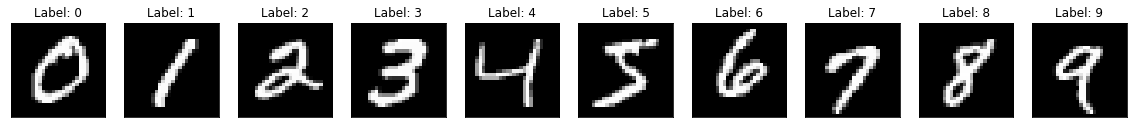

In [33]:
plt.figure(figsize = (20,20))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    index = np.where(mnist_y_train == i)[0][0]
    plt.imshow(mnist_x_train[index], cmap = "gray")
    plt.title("Label: " + str(mnist_y_train[index]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Aggiunta di un terzo canale ausiliario

In [34]:
mnist_x_train=np.expand_dims(mnist_x_train,axis=-1)
mnist_x_test=np.expand_dims(mnist_x_test,axis=-1) 

In [35]:
mnist_x_train.shape

(60000, 28, 28, 1)

Si riscalano le immagini in modo tale che il valore dei pixel dal range iniziale [0, 255] venga rimappato sul range [0, 1].

In [36]:
mnist_x_train=mnist_x_train.astype('float32')/255.0 

Conversione one-hot encoding delle etichette per comodità tecnica nella costruzione dell'output multilabel della rete neurale

In [37]:
mnist_yc_train=keras.utils.to_categorical(mnist_y_train,10)
mnist_yc_test=keras.utils.to_categorical(mnist_y_test,10)

Costruzione della rete come da consegna

In [38]:
mnist_model=keras.Sequential()
mnist_model.add(keras.Input((28,28,1))) # explicit input layer
mnist_model.add(keras.layers.Conv2D(32,(3,3))) #convolution 2d with 3x3 filters
mnist_model.add(keras.layers.ReLU()) # relu
mnist_model.add(keras.layers.MaxPooling2D((2,2))) # maxpooling 2d with 2x2 filter
mnist_model.add(keras.layers.Flatten()) #flattening
mnist_model.add(keras.layers.Dense(128)) #fully connected to 128 dimensions
mnist_model.add(keras.layers.ReLU()) # relu
mnist_model.add(keras.layers.Dense(10,activation='softmax')) #fully connected to final problem size

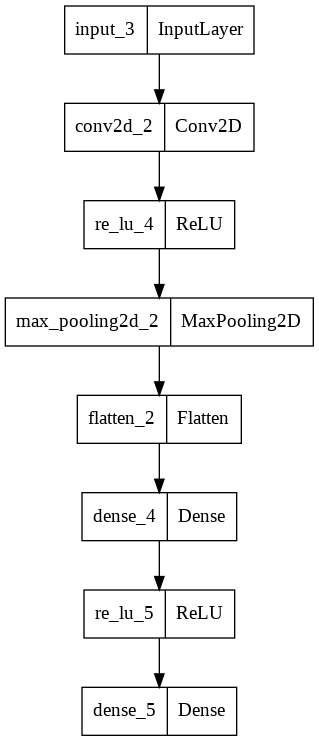

In [39]:
keras.utils.plot_model(mnist_model)

Compilazione (configurazione) della rete e scelta di funzione di loss, optimizer e metrica di valutazione. Sulla base di numerose prove e consultazioni, si è scelto RMSprop come optimizer

In [40]:
mnist_model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
mnist_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 re_lu_4 (ReLU)              (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 re_lu_5 (ReLU)              (None, 128)               0         
                                                      

Fit del modello sul training
* Batch size = 256
* Epochs = 10
* Validation split = 10%

In [41]:
mnist_fit = mnist_model.fit(mnist_x_train,mnist_yc_train,batch_size=256,epochs=10,verbose=1,
          validation_split=.1)

Epoch 1/10
211/211 [==============================] - 3s 12ms/step - loss: 0.3285 - accuracy: 0.9022 - val_loss: 0.1174 - val_accuracy: 0.9660
Epoch 2/10
211/211 [==============================] - 2s 11ms/step - loss: 0.1005 - accuracy: 0.9708 - val_loss: 0.0727 - val_accuracy: 0.9808
Epoch 3/10
211/211 [==============================] - 2s 11ms/step - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.0598 - val_accuracy: 0.9842
Epoch 4/10
211/211 [==============================] - 2s 11ms/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0493 - val_accuracy: 0.9872
Epoch 5/10
211/211 [==============================] - 2s 11ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0545 - val_accuracy: 0.9863
Epoch 6/10
211/211 [==============================] - 2s 11ms/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.0427 - val_accuracy: 0.9897
Epoch 7/10
211/211 [==============================] - 2s 10ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0477 - val_accuracy: 0.9888

Plot dell'accuratezza del modello su training e validation

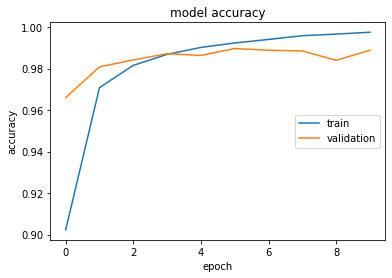

In [42]:
plt.plot(mnist_fit.history['accuracy'])
plt.plot(mnist_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

In [43]:
mnist_y_pred = mnist_model.predict(mnist_x_test)
mnist_y_pred = np.argmax(mnist_y_pred, axis = 1)
print(classification_report(mnist_y_test, mnist_y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9577    0.9929    0.9749       980
           1     0.9973    0.9859    0.9916      1135
           2     0.9889    0.9535    0.9709      1032
           3     0.9838    0.9634    0.9735      1010
           4     0.9808    0.9868    0.9838       982
           5     1.0000    0.9170    0.9567       892
           6     0.9575    0.9885    0.9728       958
           7     0.9900    0.9630    0.9763      1028
           8     0.8753    0.9877    0.9281       974
           9     0.9837    0.9594    0.9714      1009

    accuracy                         0.9703     10000
   macro avg     0.9715    0.9698    0.9700     10000
weighted avg     0.9720    0.9703    0.9705     10000



Si è ottenuta una più che buona accuratezza sul test set: 97.03%

# CIFAR 10
Il dataset CIFAR-10 è composto da 60000 immagini a colori 32x32 ripartite in 10 classi, con 6000 immagini per classe. Ci sono 50000 immagini di training set e 10000 immagini di test set.

Le 10 classi sono così codificate:
* 0: airplane (aereo)
* 1: automobile (auto)
* 2: bird (uccello)
* 3: cat (gatto)
* 4: deer (cervo)
* 5: dog (cane)
* 6: frog (rana)
* 7: horse (cavallo)
* 8: ship (nave/barca)
* 9: truck (camion)


In [44]:
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = cifar10.load_data()

In [45]:
cifar_x_train.shape #50k immagini (dimensioni 32x32) di training

(50000, 32, 32, 3)

In [46]:
cifar_y_train.shape #50k etichette

(50000, 1)

Creazione di un dizionario per assegnare a ciascun numero la sua etichetta nella visualizzazione successiva

In [47]:
cifar_dict={0:'aereo', 1:'auto', 2:'uccello', 3:'gatto', 4:'cervo', 5:'cane', 6:'rana', 7:'cavallo', 8:'barca', 9:'camion'}

Esempio per ciascuna etichetta

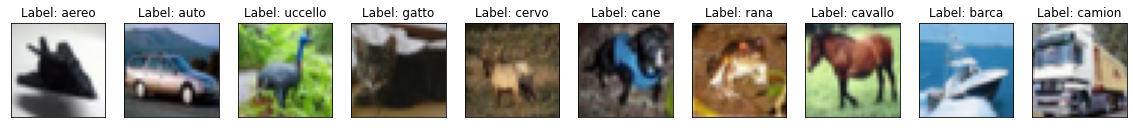

In [48]:
plt.figure(figsize = (20,20))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    index = np.where(cifar_y_train == i)[0][0]
    plt.imshow(cifar_x_train[index], cmap = "gray")
    plt.title("Label: " + str(cifar_dict[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Si riscalano le immagini in modo tale che il valore dei pixel dal range iniziale [0, 255] venga rimappato sul range [0, 1].

In [49]:
cifar_x_train=cifar_x_train.astype('float32')/255.0

Conversione one-hot encoding delle etichette per comodità tecnica nella costruzione dell'output multilabel della rete neurale

In [50]:
cifar_yc_train=keras.utils.to_categorical(cifar_y_train,10)
cifar_yc_test=keras.utils.to_categorical(cifar_y_test,10)

Costruzione della rete come da consegna

In [51]:
cifar_model=keras.Sequential()
cifar_model.add(keras.Input((32,32,3))) # explicit input layer
cifar_model.add(keras.layers.Conv2D(32,(3,3))) #convolution 2d with 3x3 filters
cifar_model.add(keras.layers.ReLU()) # relu
cifar_model.add(keras.layers.MaxPooling2D((2,2))) # maxpooling 2d with 2x2 filter
cifar_model.add(keras.layers.Flatten()) #flattening
cifar_model.add(keras.layers.Dense(128)) #fully connected to 128 dimension
cifar_model.add(keras.layers.ReLU()) # relu
cifar_model.add(keras.layers.Dense(10,activation='softmax')) #fully connected to final problem size

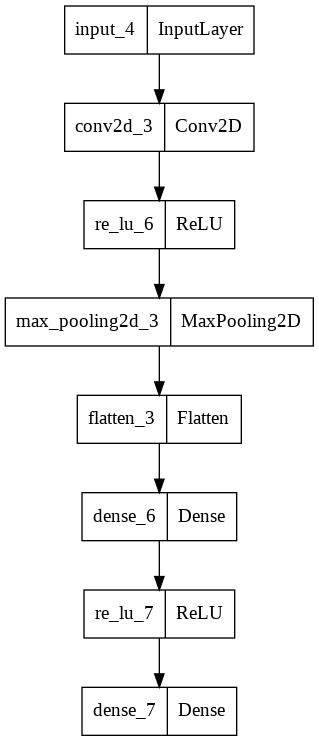

In [52]:
keras.utils.plot_model(cifar_model)

Compilazione (configurazione) della rete e scelta di funzione di loss, optimizer e metrica di valutazione. Sulla base di numerose prove e consultazioni, si è scelto Adam come optimizer

In [53]:
cifar_model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cifar_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 re_lu_6 (ReLU)              (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               921728    
                                                                 
 re_lu_7 (ReLU)              (None, 128)               0         
                                                      

Fit del modello sul training
* Batch size = 128
* Epochs = 10
* Validation split = 10%

In [54]:
cifar_fit = cifar_model.fit(cifar_x_train,cifar_yc_train,batch_size=128,epochs=10,verbose=1,
          validation_split=.1)

Epoch 1/10
352/352 [==============================] - 4s 9ms/step - loss: 1.5818 - accuracy: 0.4359 - val_loss: 1.3503 - val_accuracy: 0.5318
Epoch 2/10
352/352 [==============================] - 3s 8ms/step - loss: 1.2621 - accuracy: 0.5576 - val_loss: 1.2255 - val_accuracy: 0.5728
Epoch 3/10
352/352 [==============================] - 3s 8ms/step - loss: 1.1413 - accuracy: 0.6021 - val_loss: 1.1361 - val_accuracy: 0.6120
Epoch 4/10
352/352 [==============================] - 3s 8ms/step - loss: 1.0596 - accuracy: 0.6321 - val_loss: 1.0725 - val_accuracy: 0.6340
Epoch 5/10
352/352 [==============================] - 3s 8ms/step - loss: 0.9978 - accuracy: 0.6555 - val_loss: 1.0638 - val_accuracy: 0.6324
Epoch 6/10
352/352 [==============================] - 3s 8ms/step - loss: 0.9455 - accuracy: 0.6724 - val_loss: 1.0267 - val_accuracy: 0.6512
Epoch 7/10
352/352 [==============================] - 3s 8ms/step - loss: 0.8960 - accuracy: 0.6900 - val_loss: 1.0328 - val_accuracy: 0.6460
Epoch 

Plot dell'accuratezza del modello su training e validation

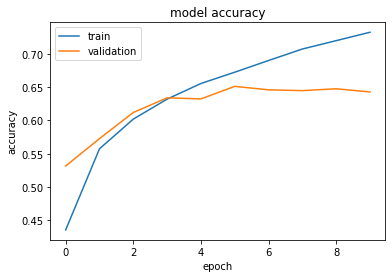

In [55]:
plt.plot(cifar_fit.history['accuracy'])
plt.plot(cifar_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [56]:
cifar_y_pred = cifar_model.predict(cifar_x_test)
cifar_y_pred = np.argmax(cifar_y_pred, axis = 1)
print(classification_report(cifar_y_test, cifar_y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.4489    0.8080    0.5771      1000
           1     0.6343    0.7510    0.6877      1000
           2     0.6588    0.2510    0.3635      1000
           3     0.4024    0.3340    0.3650      1000
           4     0.6720    0.2500    0.3644      1000
           5     0.4185    0.6520    0.5098      1000
           6     0.8727    0.4250    0.5716      1000
           7     0.5146    0.7410    0.6074      1000
           8     0.6450    0.5960    0.6195      1000
           9     0.6328    0.6480    0.6403      1000

    accuracy                         0.5456     10000
   macro avg     0.5900    0.5456    0.5306     10000
weighted avg     0.5900    0.5456    0.5306     10000



Si è ottenuta un'accuratezza media sul test set: 54.56%. Sarebbe il caso di considerare altri iperparametri o altre strutture per reti neurali.